# 📘 Advanced Internship Assignment: Data Exploration & Analysis in Python

---

## 📦 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

## 🧾 2. Load the Dataset (Big Mart Sales)

In [3]:
# Load the dataset
df = pd.read_csv('big_mart_sales - big_mart_sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### ✅ Task:
- Display the dataset info
- Count missing values
- Understand the basic structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 🔧 3. Data Cleaning & Imputation

In [19]:
# Fill missing weights with mean
if 'Item_Weight' in df.columns:
    df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

# Fill outlet size with mode
if 'Outlet_Size' in df.columns:
    df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])


In [23]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 📊 4. Feature Engineering

In [25]:
# Create new features based on domain knowledge
if 'Item_Visibility' in df.columns:
    df['Item_Visibility_Bin'] = pd.cut(df['Item_Visibility'], bins=[-1, 0.02, 0.07, 0.2, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])

# Normalize Item_MRP
if 'Item_MRP' in df.columns:
    df['Item_MRP_Normalized'] = (df['Item_MRP'] - df['Item_MRP'].min()) / (df['Item_MRP'].max() - df['Item_MRP'].min())

In [29]:
print(df[['Item_Visibility','Item_Visibility_Bin','Item_MRP_Normalized','Item_MRP']].head())

   Item_Visibility Item_Visibility_Bin  Item_MRP_Normalized  Item_MRP
0         0.016047                 Low             0.927507  249.8092
1         0.019278                 Low             0.072068   48.2692
2         0.016760                 Low             0.468288  141.6180
3         0.000000                 Low             0.640093  182.0950
4         0.000000                 Low             0.095805   53.8614


## 📈 5. Exploratory Data Analysis (EDA)

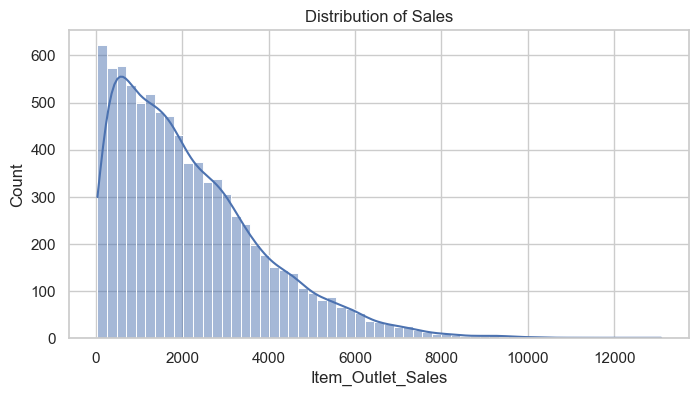

In [31]:
# Distribution of target variable
plt.figure(figsize=(8, 4))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

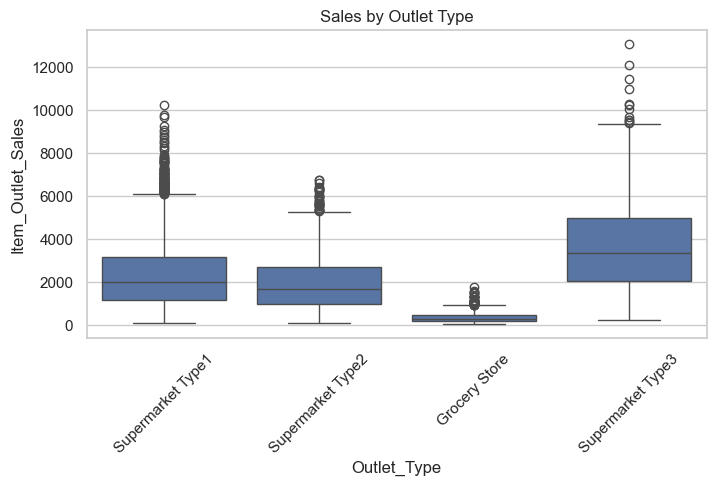

In [33]:
# Sales by Outlet Type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()

## 📐 6. Advanced Subsetting with NumPy & Conditions

In [35]:
# Filter high selling products
high_sales = df['Item_Outlet_Sales'] > df['Item_Outlet_Sales'].quantile(0.90)
df_high_sales = df[high_sales]
df_high_sales[['Item_Identifier', 'Item_Outlet_Sales']].head()

,Item_Identifier,Item_Outlet_Sales
9,FDU28,4710.5350
43,FDC02,6768.5228
47,FDV49,5815.0972
54,NCP18,4815.0656
55,FDK21,6258.5200


In [39]:
# Use NumPy to apply conditional logic
df['High_Price'] = np.where(df['Item_MRP'] > 200, 1, 0)
df[['Item_MRP', 'High_Price']].head()

,Item_MRP,High_Price
0,249.8092,1
1,48.2692,0
2,141.6180,0
3,182.0950,0
4,53.8614,0


## 📉 7. Correlation Heatmap

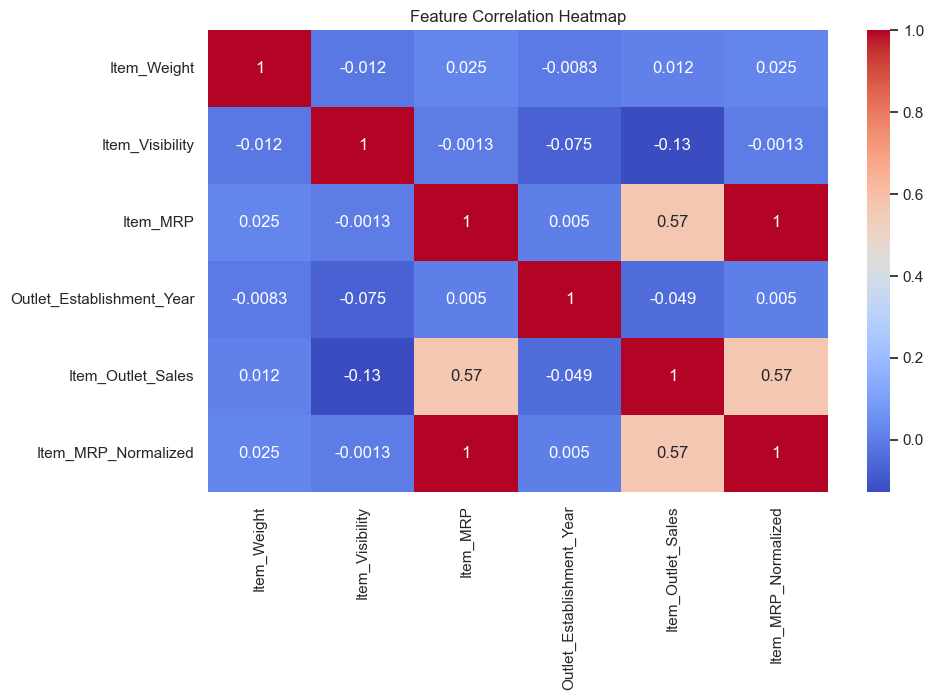

In [37]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
## 📌 Final Project Task

'''Create a business dashboard answering:
1. What product categories perform best?
2. Which outlet types generate more revenue?
3. Are high MRP products really driving more sales?

Deliverables:
- Python notebook with visualizations
- Insight summary (2 paragraphs)
- Exported charts/images if needed
'''


### 1)What product categories perform best?

In [58]:
category_performance = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

## 2) Which outlet types generate more revenue?

In [61]:
outlet_revenue = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

## 3) Are high MRP products really driving more sales?

In [64]:
df['MRP_Band'] = pd.qcut(df['Item_MRP'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
mrp_sales = df.groupby('MRP_Band',observed=True)['Item_Outlet_Sales'].mean()

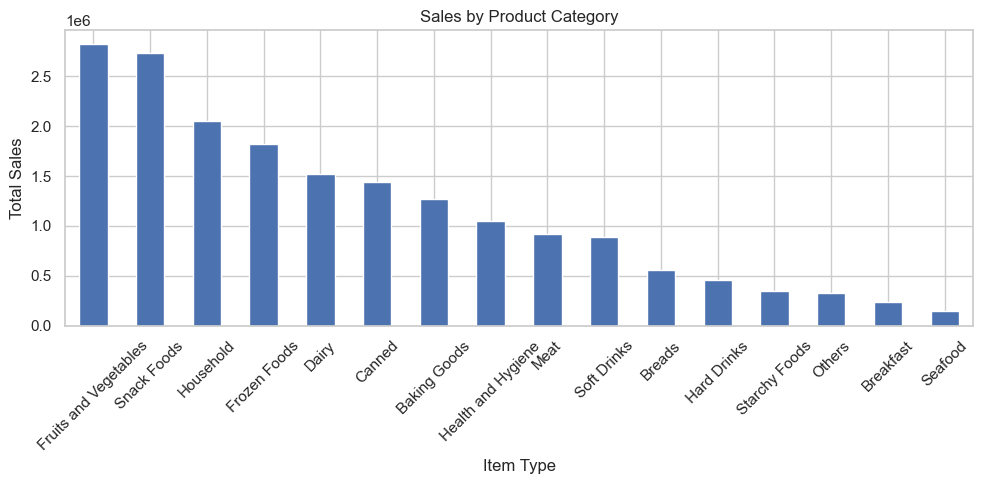

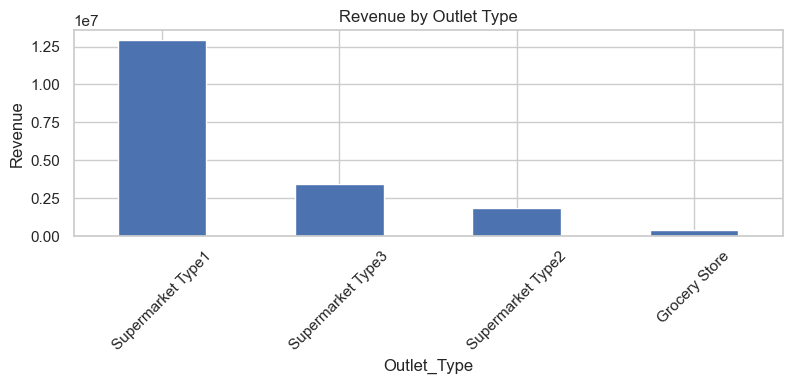

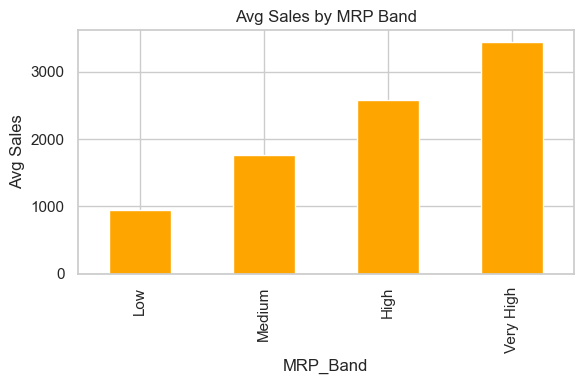

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Product Categories That Perform Best
category_performance = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
category_performance.plot(kind='bar', title='Sales by Product Category', figsize=(10,5))
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Revenue by Outlet Type
outlet_revenue = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
outlet_revenue.plot(kind='bar', title='Revenue by Outlet Type', figsize=(8,4))
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MRP Impact on Sales
df['MRP_Band'] = pd.qcut(df['Item_MRP'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
mrp_sales = df.groupby('MRP_Band', observed=True)['Item_Outlet_Sales'].mean()
mrp_sales.plot(kind='bar', title='Avg Sales by MRP Band', color='orange', figsize=(6,4))
plt.ylabel('Avg Sales')
plt.tight_layout()
plt.show()


## Insight summary

### 
In general daily needs like fruits and vegetables , snacks are sold more than health and hygiene , sea foods and hard drinks. 
From this we see daily needs were giving more sales. 
In revenue outlet, Supermarket type 1 plays major role for revenue for that outlet compared to grocery store and type 2 , type 3 stores. 
In MRP very high products show average sales .
